# Haberman EDA

 The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hbr = pd.read_csv("haberman.csv")#using pandas to read .csv file

In [3]:
print(hbr.shape)

(306, 4)


conclusion:total number of data points are 306.total features are 4. 

In [4]:
print(hbr.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
hbr.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Attribute Information:
Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [6]:
hbr["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

conclusion: Dataset is  imbalance.

# 2D scatter plot

# year vs age

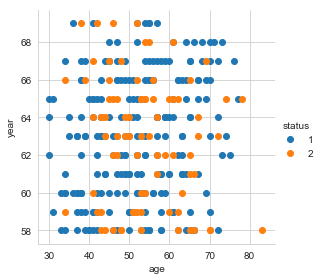

In [7]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(hbr, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();

Both classes are overlapping.
we cannot seperate both classes by a line.
Although we notice that survival status of class 2(died within 5 years) is very less below 40 age group. 

# nodes vs age

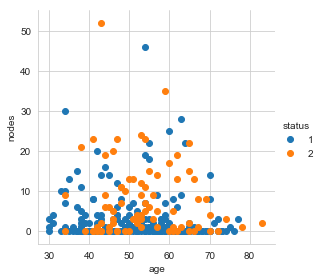

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(hbr, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

since data is imbalance having status 1 :status 2 =225:81,still above 30 nodes there are more cases of status 2.
In this plot we notice as no of nodes are increasing the cases of status 2 is more. 

# year vs nodes

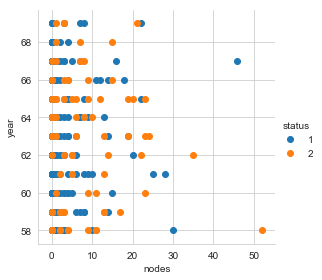

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(hbr, hue="status", height=4) \
   .map(plt.scatter, "nodes", "year") \
   .add_legend();
plt.show();

since data points evenly spread over years there is almost no impact of year on survival status

# 2d pair plot

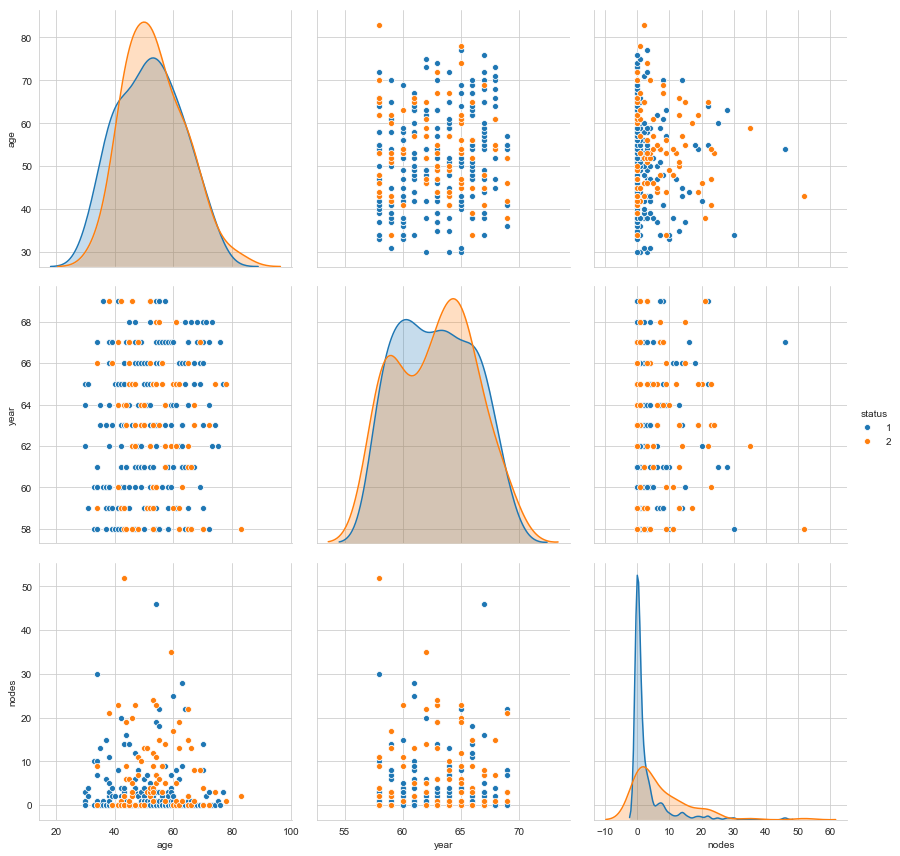

In [14]:

sns.set_style("whitegrid");
sns.pairplot(hbr, hue="status",vars=["age","year","nodes"] ,height=4);
plt.show()

pair plots are not sufficient  to determine any conclusion.
pdf of nodes seems good and can give some conclusion.

# PDF

# pdf of nodes

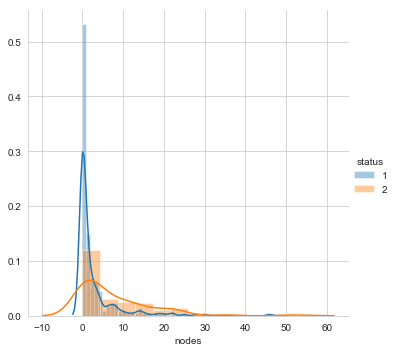

In [32]:
sns.FacetGrid(hbr, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

The pdf of status 1 is centered at 0-1 .means survival status 1 has maximum probability at nodes 0,1.
The pdf of status 2 is centered at 4 .means survival status 0 has maximum probability at node 4.

# pdf of age

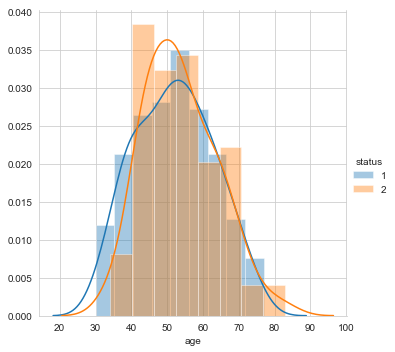

In [33]:
sns.FacetGrid(hbr, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

both pdf are overlappling so we can't get any reasonable conclusion.

# univariate analysis

In [39]:
status1= hbr.loc[hbr["status"] == 1];
status2 = hbr.loc[hbr["status"] == 2];


# Analysis of status 1

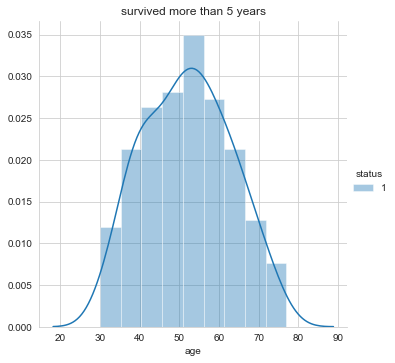

In [42]:
sns.FacetGrid(status1, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("survived more than 5 years")
plt.show();


maximum survival of status 1 is at 50-55 years .

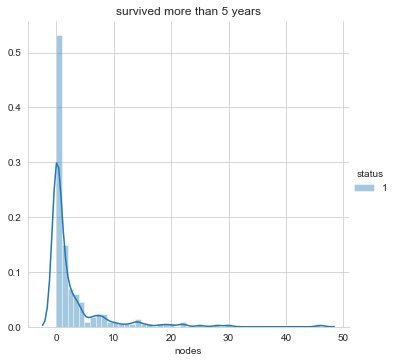

In [54]:
sns.FacetGrid(status1, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("survived more than 5 years")
plt.show();


most of survivor of status 1 are below 10 nodes.

# CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


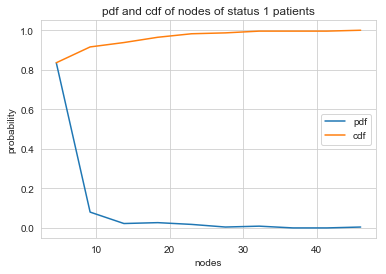

In [44]:
counts, bin_edges = np.histogram(status1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.ylabel('probability')
plt.title('pdf and cdf of nodes of status 1 patients')
plt.legend(['pdf','cdf'])


plt.show();

among all survival above 93% patient survived with nodes less than 10

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


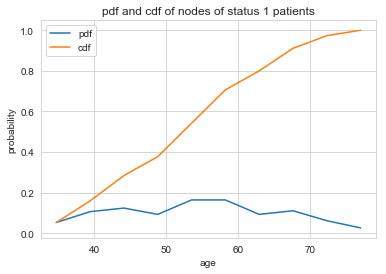

In [45]:
counts, bin_edges = np.histogram(status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.ylabel('probability')
plt.title('pdf and cdf of age of status 1 patients')
plt.legend(['pdf','cdf'])


plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


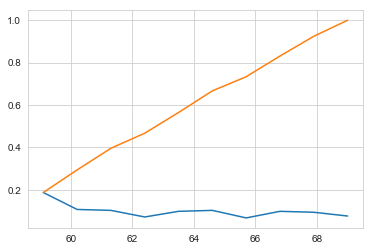

In [25]:
counts, bin_edges = np.histogram(status1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.ylabel('probability')
plt.title('pdf and cdf of year of status 1 patients')
plt.legend(['pdf','cdf'])


plt.show();

almost linear straight line cdf means year has not impact

# analysis of status 2 (patient who died before 5 year)

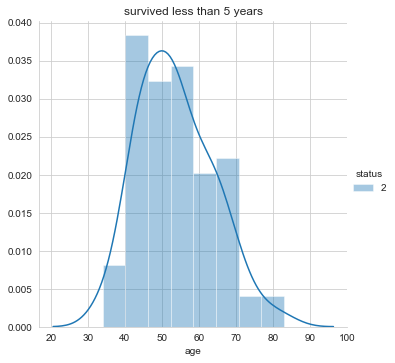

In [52]:
sns.FacetGrid(status2, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("survived less than 5 years")
plt.show();


no patient below 35 years of age of status 2.
maximum patient lies between 40-70 years of age

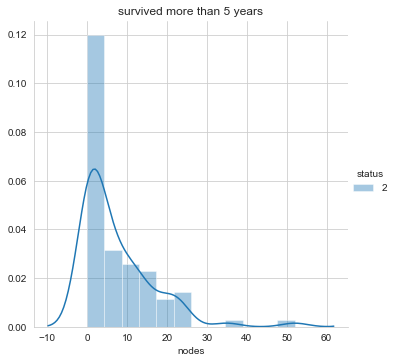

In [56]:
sns.FacetGrid(status2, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("survived more than 5 years")
plt.show();


maximum patient of status 2 have 0-10 nodes.

# CDF

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


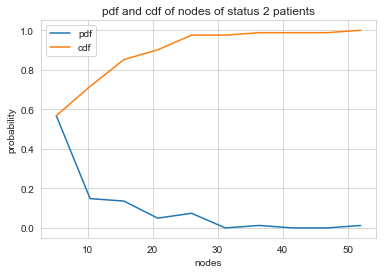

In [51]:
counts, bin_edges = np.histogram(status2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.ylabel('probability')
plt.title('pdf and cdf of nodes of status 2 patients')
plt.legend(['pdf','cdf'])


plt.show();

most of patient who died had nodes between 4-30 with node 4-6 being maximum

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


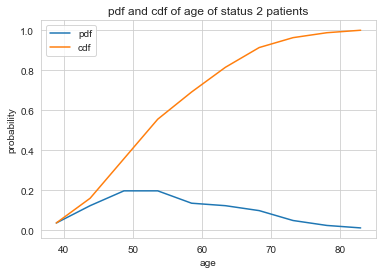

In [48]:
counts, bin_edges = np.histogram(status2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.ylabel('probability')
plt.title('pdf and cdf of age of status 2 patients')
plt.legend(['pdf','cdf'])


plt.show();

pdf is highest at age 50.means most people who died where 50 years of age.

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


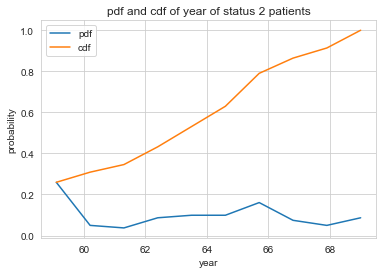

In [49]:
counts, bin_edges = np.histogram(status2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.ylabel('probability')
plt.title('pdf and cdf of year of status 2 patients')
plt.legend(['pdf','cdf'])


plt.show();

cdf is almost linear.but most of the died people were earlier 60s.

# means

In [29]:
print("Means:")
print(np.mean(status1["nodes"]))
print(np.mean(status2["nodes"]))
print("\nStd-dev:");
print(np.std(status1["nodes"]))
print(np.std(status2["nodes"]))

Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


higher nodes leads less chance of survival.

# Median, Quantiles, Percentiles, IQR.

# nodes

In [30]:

print("\nMedians:")
print(np.median(status1["nodes"]))
print(np.median(status2["nodes"]))


print("\nQuantiles:")
print(np.percentile(status1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(status2["nodes"],np.arange(0, 100, 25)))
print("\n90th Percentiles:")
print(np.percentile(status1["nodes"],90))
print(np.percentile(status2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(status1["nodes"]))
print(robust.mad(status2["nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


most of surviver of status 1 has 0 nodes.
median of status 2 surviver is 4.
75% of patient of status 2 has less than 11 nodes.
90% of patient of status 2 has less than 20 nodes.
75% of patient of status 1 has less than 3 nodes.
90% of patient of status 1 has less than 8 nodes.
conclusion:less no of nodes leads more survival rate of status 1 category.


# age

In [57]:
print("\nMedians:")
print(np.median(status1["age"]))
print(np.median(status2["age"]))


print("\nQuantiles:")
print(np.percentile(status1["age"],np.arange(0, 100, 25)))
print(np.percentile(status2["age"],np.arange(0, 100, 25)))
print("\n90th Percentiles:")
print(np.percentile(status1["age"],90))
print(np.percentile(status2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(status1["age"]))
print(robust.mad(status2["age"]))



Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


almost similar outcome of status 1 and status 2.

# boxplot with whisker

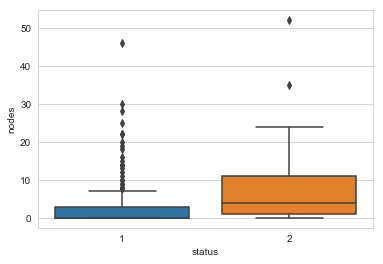

In [34]:
sns.boxplot(x='status',y='nodes', data=hbr)
plt.show()

75% of patient of status 1 category has less than 8 nodes.

50% of patient of status 2 category are between 1-11 nodes.

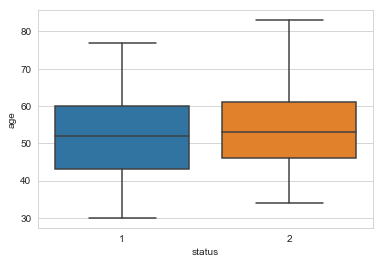

In [58]:
sns.boxplot(x='status',y='age', data=hbr)
plt.show()

50% of patient of status 1 category are between 43-60 years age.

50% of patient of status 2 category are between 47-63 years age.



# violinplot

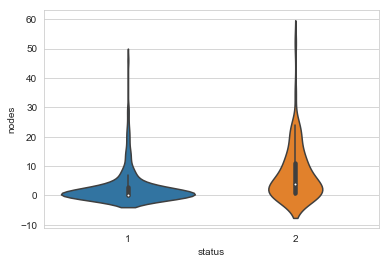

In [35]:
sns.violinplot(x="status", y="nodes", data=hbr, size=8)
plt.show()

maximum probability is at 4 nodes  for status 2 patient and 0 for status 1 

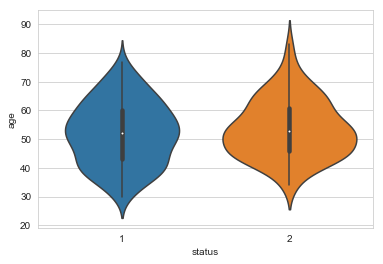

In [61]:
sns.violinplot(x="status", y="age", data=hbr, size=8)
plt.show()

gives similar idea as boxplot.

Although we see that maximum probability is at 50years  for status 2 patient and 53 for status 1 .

conclusions:

    1.Data is imbalanced as ~74% of data belong to status 1 while ~26% belong to status 2.
    
    2.year as feature is not useful for classifing survival status.
    
    3.Most of the patient of status 1 has nodes between 0-3.
    
    4.As no of nodes is increasing survival status 2 category is increasing.
    
    5.no patient died less than 34 years of age.
    
    6.most patient survived more than 5 years are less than ~47 years.

In [65]:
haberman_nodes_below_3 = hbr[hbr['nodes']<3]
haberman_nodes_below_3['status'].value_counts()

1    165
2     32
Name: status, dtype: int64

83% of patient having less than 3 nodes survived more than 5 years which conforms our conclusion 3.


In [67]:
haberman_age_below_47 = hbr.loc[hbr['age']<=40]
haberman_age_below_47['status'].value_counts()

1    39
2     4
Name: status, dtype: int64

90% of patient below 47 years of age survived more than 5 years which supports our conclusion 6.